In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

## Gene regulatory network

We are modelling a gene regulatory network where gene G1 activates genes G2 and G3, G2 activates G3, and G3 inhibits G1. The model is defined by the following differential equations:

$$
\frac{d[G1](t)}{dt} = k_{1} \frac{1}{1 + K_{13} \cdot [G3]} - d_{1} \cdot [G1]
$$

$$
\frac{d[G2](t)}{dt} = k_{2} \frac{K_{21} \cdot [G1]}{1 + K_{21} \cdot [G1]} - d_{2} \cdot [G2]
$$

$$
\frac{d[G3](t)}{dt} = k_{3} \frac{K_{31} \cdot [G1] \cdot K_{32} \cdot [G2]}{(1 + K_{31} \cdot [G1]) \cdot (1 + K_{32} \cdot [G2])} - d_{3} \cdot [G3]
$$



### Question 1

Run the model using the predefined regulatory function.


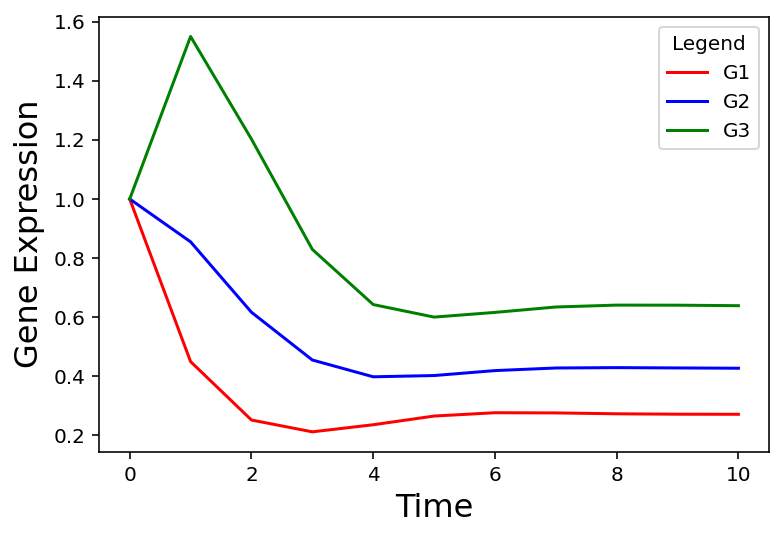

In [4]:
def gene_reg(t, x, k1, k2, k3, K13, K21, K31, K32, d1, d2, d3):
    g1 = x[0]
    g2 = x[1]
    g3 = x[2]
    dg1dt = k1 / (1 + K13 * g3) - d1 * g1
    dg2dt = k2 * K21 * g1 / (1 + K21 * g1) - d2 * g2
    dg3dt = k3 * (K31 * g1 * K32 * g2) / ((1 + K31 * g1) * (1 + K32 * g2)) - d3 * g3
    return [dg1dt, dg2dt, dg3dt]


Tmax = 11                
t_span = (0, Tmax)          
t = np.arange(0, Tmax, 1)
k1 = k2 = 2
k3 = 10
k13= 10
k21 = k31 = k32 = 1
d1 = d2 = d3 = 1

x0 = [1, 1, 1] 

pop1 = solve_ivp(gene_reg, t_span, x0, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)

plt.plot(pop1.t, pop1.y[0], 'r', label="G1")
plt.plot(pop1.t, pop1.y[1], 'b', label="G2")
plt.plot(pop1.t, pop1.y[2], 'g', label="G3")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Gene Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

### Question 2

How do the results change for different initial conditions?


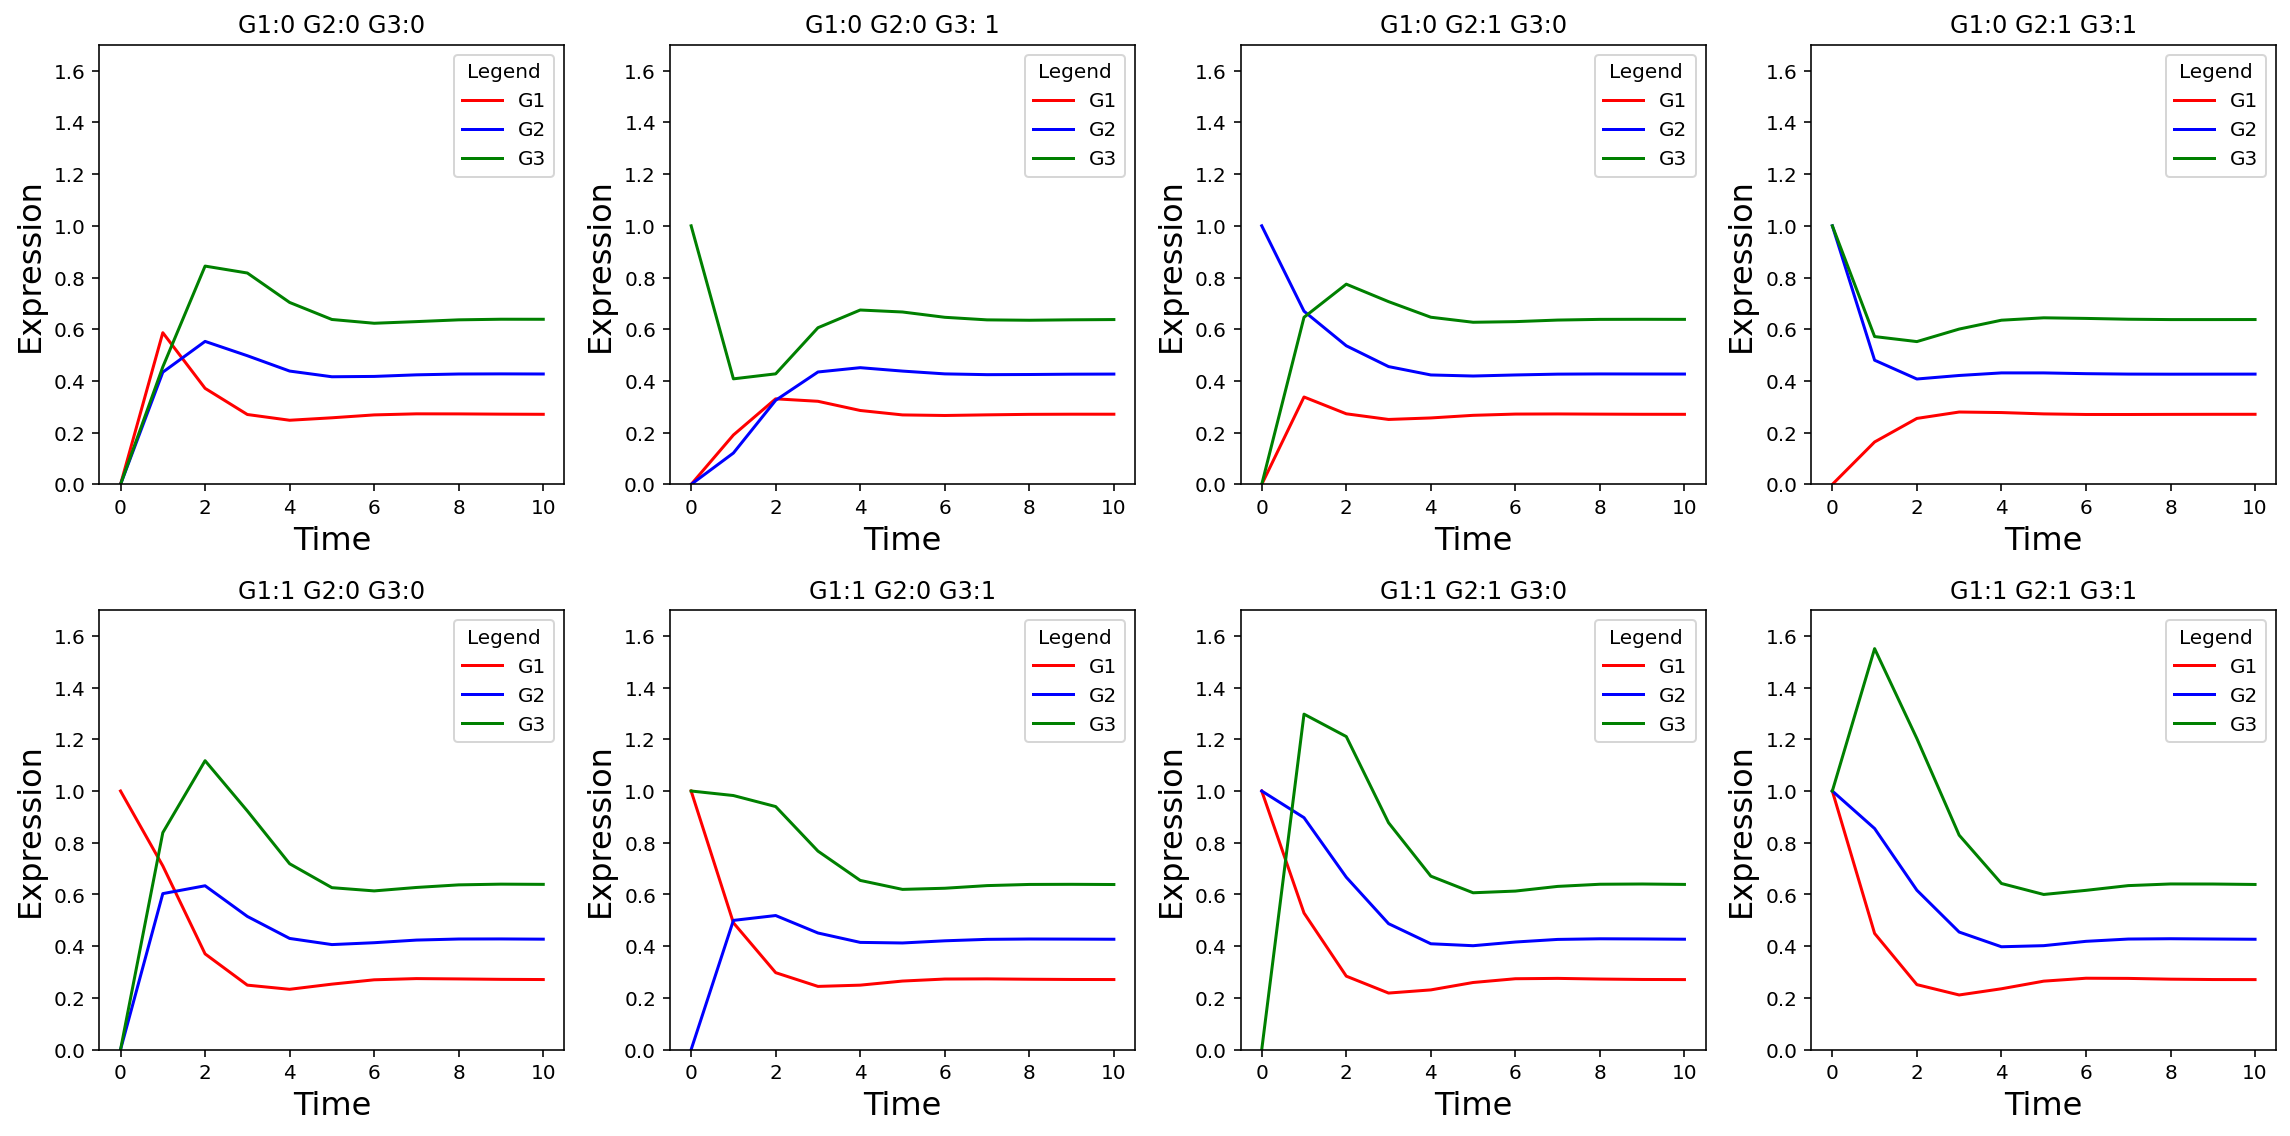

In [5]:
x01 = [0, 0, 0] 
x02 = [0, 0, 1]
x03 = [0, 1, 0]
x04 = [0, 1, 1]
x05 = [1, 0, 0]
x06 = [1, 0, 1]
x07 = [1, 1, 0]
x08 = [1, 1, 1]



pop1 = solve_ivp(gene_reg, t_span, x01, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop2 = solve_ivp(gene_reg, t_span, x02, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop3 = solve_ivp(gene_reg, t_span, x03, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop4 = solve_ivp(gene_reg, t_span, x04, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop5 = solve_ivp(gene_reg, t_span, x05, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop6 = solve_ivp(gene_reg, t_span, x06, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop7 = solve_ivp(gene_reg, t_span, x07, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop8 = solve_ivp(gene_reg, t_span, x08, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)



plt.figure(figsize=(16,8))


plt.subplot(2, 4, 1)
plt.ylim(0,1.7)
plt.plot(pop1.t, pop1.y[0], 'r', label="G1")
plt.plot(pop1.t, pop1.y[1], 'b', label="G2")
plt.plot(pop1.t, pop1.y[2], 'g', label="G3")
plt.title(f"G1:{x01[0]} G2:{x01[1]} G3:{x01[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 2)
plt.ylim(0,1.7)
plt.plot(pop2.t, pop2.y[0], 'r', label="G1")
plt.plot(pop2.t, pop2.y[1], 'b', label="G2")
plt.plot(pop2.t, pop2.y[2], 'g', label="G3")
plt.title(f"G1:{x02[0]} G2:{x02[1]} G3: {x02[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 3)
plt.ylim(0,1.7)
plt.plot(pop3.t, pop3.y[0], 'r', label="G1")
plt.plot(pop3.t, pop3.y[1], 'b', label="G2")
plt.plot(pop3.t, pop3.y[2], 'g', label="G3")
plt.title(f"G1:{x03[0]} G2:{x03[1]} G3:{x03[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 4)
plt.ylim(0,1.7)
plt.plot(pop4.t, pop4.y[0], 'r', label="G1")
plt.plot(pop4.t, pop4.y[1], 'b', label="G2")
plt.plot(pop4.t, pop4.y[2], 'g', label="G3")
plt.title(f"G1:{x04[0]} G2:{x04[1]} G3:{x04[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")


plt.subplot(2, 4, 5)
plt.ylim(0,1.7)
plt.plot(pop5.t, pop5.y[0], 'r', label="G1")
plt.plot(pop5.t, pop5.y[1], 'b', label="G2")
plt.plot(pop5.t, pop5.y[2], 'g', label="G3")
plt.title(f"G1:{x05[0]} G2:{x05[1]} G3:{x05[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 6)
plt.ylim(0,1.7)
plt.plot(pop6.t, pop6.y[0], 'r', label="G1")
plt.plot(pop6.t, pop6.y[1], 'b', label="G2")
plt.plot(pop6.t, pop6.y[2], 'g', label="G3")
plt.title(f"G1:{x06[0]} G2:{x06[1]} G3:{x06[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 7)
plt.ylim(0,1.7)
plt.plot(pop7.t, pop7.y[0], 'r', label="G1")
plt.plot(pop7.t, pop7.y[1], 'b', label="G2")
plt.plot(pop7.t, pop7.y[2], 'g', label="G3")
plt.title(f"G1:{x07[0]} G2:{x07[1]} G3:{x07[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(2, 4, 8)
plt.ylim(0,1.7)
plt.plot(pop8.t, pop8.y[0], 'r', label="G1")
plt.plot(pop8.t, pop8.y[1], 'b', label="G2")
plt.plot(pop8.t, pop8.y[2], 'g', label="G3")
plt.title(f"G1:{x08[0]} G2:{x08[1]} G3:{x08[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")



plt.tight_layout()  
plt.show()

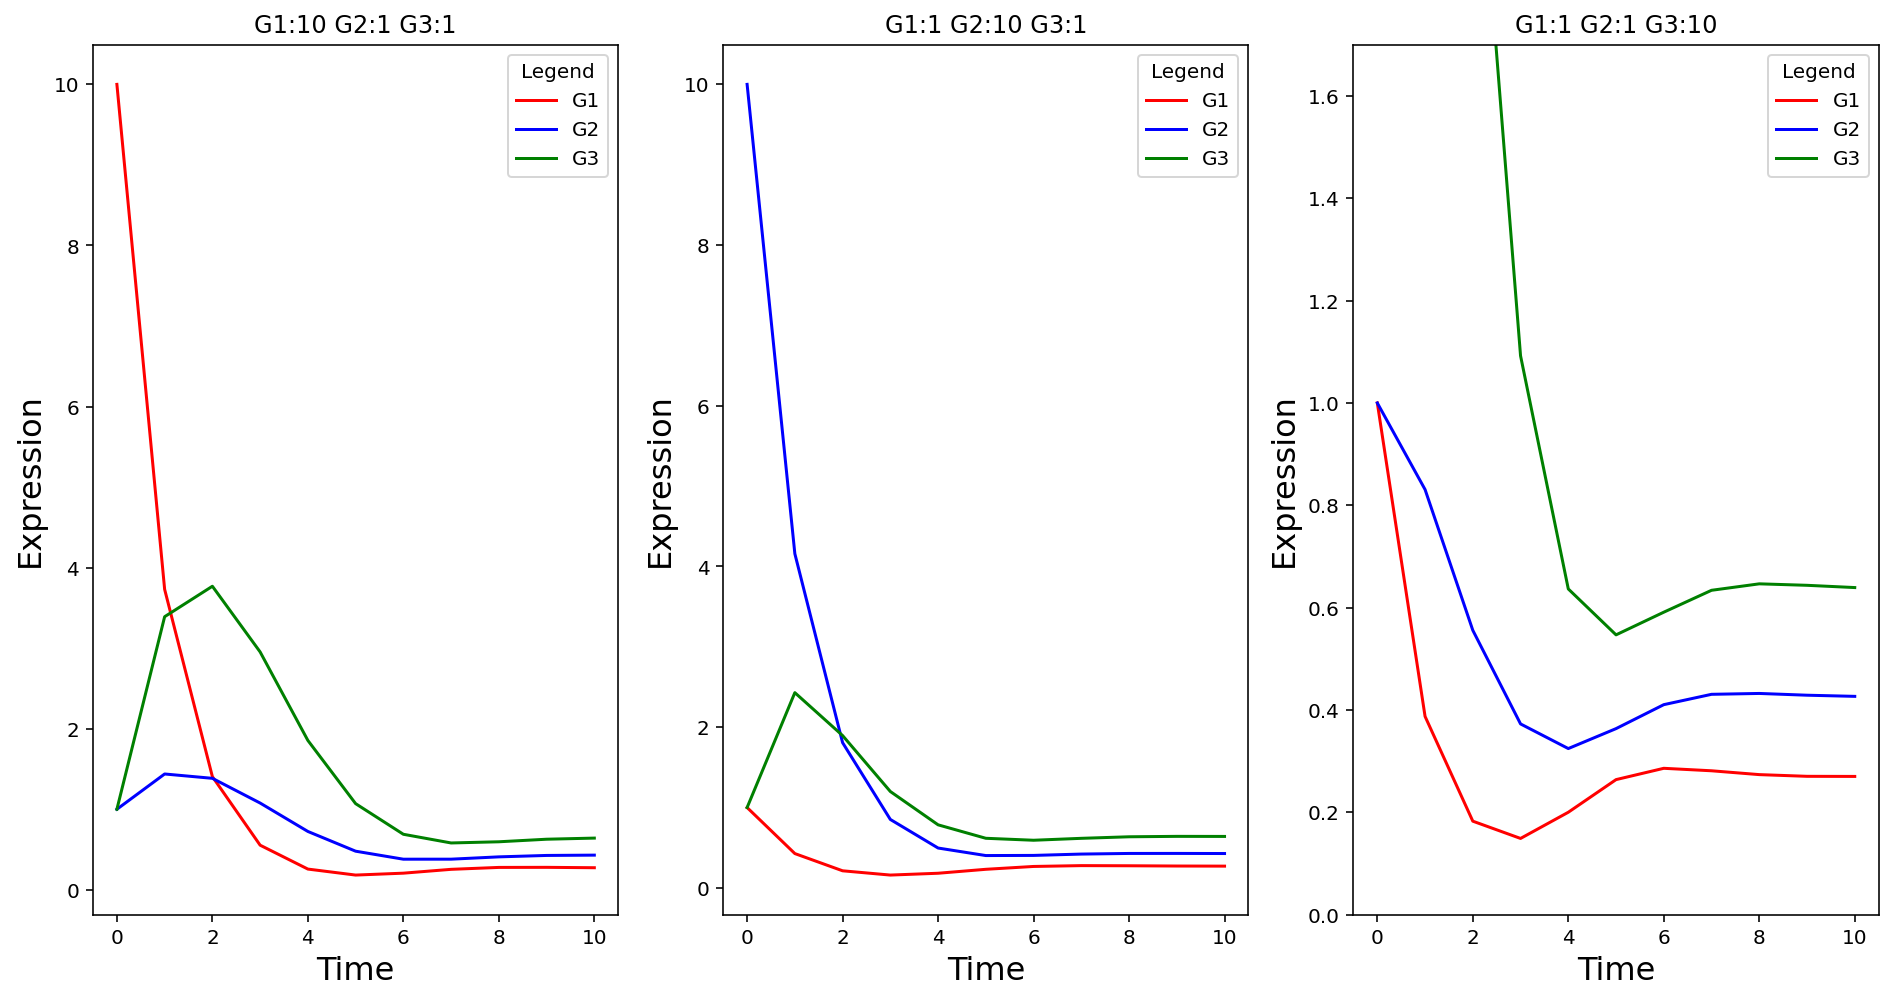

In [8]:
# Extreme conditions, not included in the report as they do not reveal any novel patterns

x09 = [10,1,1]
x010 = [1,10,1]
x011 = [1,1,10]

pop9 = solve_ivp(gene_reg, t_span, x09, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop10 = solve_ivp(gene_reg, t_span, x010, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)
pop11 = solve_ivp(gene_reg, t_span, x011, args=[k1, k2, k3, k13, k21, k31, k32, d1, d2, d3], t_eval=t)

plt.figure(figsize=(16,8))

plt.subplot(1, 3, 1)
plt.plot(pop9.t, pop9.y[0], 'r', label="G1")
plt.plot(pop9.t, pop9.y[1], 'b', label="G2")
plt.plot(pop9.t, pop9.y[2], 'g', label="G3")
plt.title(f"G1:{x09[0]} G2:{x09[1]} G3:{x09[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(1, 3, 2)
plt.plot(pop10.t, pop10.y[0], 'r', label="G1")
plt.plot(pop10.t, pop10.y[1], 'b', label="G2")
plt.plot(pop10.t, pop10.y[2], 'g', label="G3")
plt.title(f"G1:{x010[0]} G2:{x010[1]} G3:{x010[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

plt.subplot(1, 3, 3)
plt.ylim(0,1.7)
plt.plot(pop11.t, pop11.y[0], 'r', label="G1")
plt.plot(pop11.t, pop11.y[1], 'b', label="G2")
plt.plot(pop11.t, pop11.y[2], 'g', label="G3")
plt.title(f"G1:{x011[0]} G2:{x011[1]} G3:{x011[2]}")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Expression", fontsize=16)
plt.legend(loc='upper right', title="Legend")

### Question 3

Explain how you would find the steady states of the model.



The steady states of the model are found when the gradient of each line is 0. During differential equations this means that this is when the derivative is 0. See report for further explanation.
